<a href="https://colab.research.google.com/github/zine1919/Portfolio-Optimization/blob/main/Projet_Segmentation_des_clients.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Segmentation des clients(en raison du comportement de la carte de crédit).

Notre démarche consiste à répondre à des questions telles que les habitudes de dépenses, l'identification des individus retirant davantage d'espèces, la localisation de ceux effectuant des achats de valeur plus élevée, et la détermination de la préférence pour les paiements échelonnés. En fonction des réponses à ces questions, des décisions concrètes peuvent être prises, telles que l'ajustement des limites de crédit pour certains clients ou l'information de certains individus sur les opportunités de paiement échelonné.


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # some graphs
import seaborn as sns # helping with some visualization techniques
from sklearn.preprocessing import StandardScaler # scaling
from sklearn.cluster import KMeans # k-means algorithm library
from sklearn.decomposition import PCA #applying principal component analysis
from sklearn.metrics.pairwise import cosine_similarity
import io #reading files for all systems

import warnings
warnings.filterwarnings(action="ignore")


Le jeu de données d'échantillon résume le comportement d'utilisation d'environ 9000 titulaires de cartes de crédit actifs au cours des 6 derniers mois. Le fichier est au niveau du client avec 18 variables comportementales.

Voici le dictionnaire des données pour le jeu de données sur les cartes de crédit :

CUSTID : Identification du titulaire de la carte de crédit (Catégorique)

BALANCE : Montant du solde restant sur leur compte pour effectuer des achats

BALANCEFREQUENCY : Fréquence de mise à jour du solde, score entre 0 et 1 (1 = fréquemment mis à jour, 0 = pas fréquemment mis à jour)

PURCHASES : Montant des achats effectués à partir du compte

ONEOFFPURCHASES : Montant maximum d'achat effectué en une seule fois

INSTALLMENTSPURCHASES : Montant des achats effectués en versements

CASHADVANCE : Avance en espèces accordée par l'utilisateur

PURCHASESFREQUENCY : Fréquence des achats, score entre 0 et 1 (1 = fréquemment acheté, 0 = pas fréquemment acheté)

ONEOFFPURCHASESFREQUENCY : Fréquence des achats en une seule fois (1 = fréquemment acheté, 0 = pas fréquemment acheté)

PURCHASESINSTALLMENTSFREQUENCY : Fréquence des achats à tempérament (1 = fréquemment effectué, 0 = pas fréquemment effectué)

CASHADVANCEFREQUENCY : Fréquence du paiement en espèces à l'avance

CASHADVANCETRX : Nombre de transactions effectuées avec "Cash in Advanced"

PURCHASESTRX : Nombre de transactions d'achat effectuées

CREDITLIMIT : Limite de la carte de crédit pour l'utilisateur

PAYMENTS : Montant du paiement effectué par l'utilisateur

MINIMUM_PAYMENTS : Montant minimum des paiements effectués par l'utilisateur

PRCFULLPAYMENT : Pourcentage du paiement intégral effectué par l'utilisateur

TENURE : Durée du service de la carte de crédit pour l'utilisateur

Voila le lien :https://www.kaggle.com/arjunbhasin2013/ccdata










In [ ]:
from google.colab import files
uploaded = files.upload()


Saving consumer.csv to consumer.csv


In [ ]:
customer = pd.read_csv(io.BytesIO(uploaded['consumer.csv']))
customer.head()



,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
customer = pd.read_csv('consumer.csv')
customer = customer.dropna()
customer.head()


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12


#Data Preprocessing

In [ ]:
customer.dtypes


CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [ ]:
customer.describe()


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000
mean,1601.224893,0.895035,1025.433874,604.901438,420.843533,994.175523,0.496000,0.205909,0.368820,0.137604,3.313918,15.033233,4522.091030,1784.478099,864.304943,0.159304,11.534391
std,2095.571300,0.207697,2167.107984,1684.307803,917.245182,2121.458303,0.401273,0.300054,0.398093,0.201791,6.912506,25.180468,3659.240379,2909.810090,2372.566350,0.296271,1.310984
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.049513,0.019163,0.000000,6.000000
25%,148.095189,0.909091,43.367500,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,418.559237,169.163545,0.000000,12.000000
50%,916.855459,1.000000,375.405000,44.995000,94.785000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,896.675701,312.452292,0.000000,12.000000
75%,2105.195853,1.000000,1145.980000,599.100000,484.147500,1132.385490,0.916667,0.333333,0.750000,0.250000,4.000000,18.000000,6500.000000,1951.142090,825.496463,0.166667,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [ ]:
customer.isnull().sum()


CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [ ]:
customer.loc[(customer['MINIMUM_PAYMENTS'].isnull()==True),'MINIMUM_PAYMENTS']=customer['MINIMUM_PAYMENTS'].mean()
customer.loc[(customer['CREDIT_LIMIT'].isnull()==True),'CREDIT_LIMIT']=customer['CREDIT_LIMIT'].mean()


In [ ]:
customer.isnull().sum()


CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

#Détection des valeurs abhérentes
Les valeurs aberrantes sont des points de données qui s'écartent significativement du schéma général ou de la tendance des données.\
Pour les détecter , on utilise les graphiques de dispersion : plt.scatter(), les points qui sont éloignés du cluster principal de points de données sont les Les valeurs aberrantes. Les valeurs aberrantes peuvent se présenter sous la forme de points éloignés de la majorité des données.








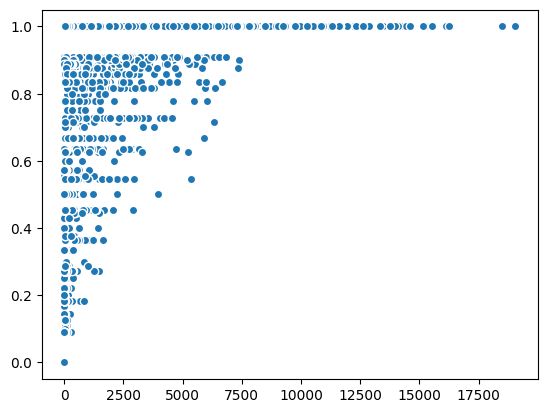

In [ ]:
plt.scatter(customer["BALANCE"], customer["BALANCE_FREQUENCY"], edgecolors="white");


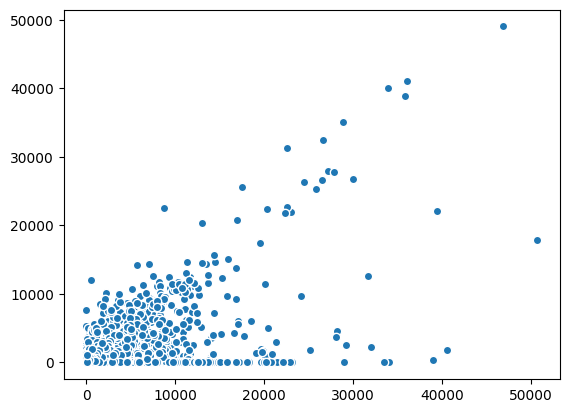

In [ ]:
plt.scatter(customer["PAYMENTS"], customer["PURCHASES"], edgecolors="white");


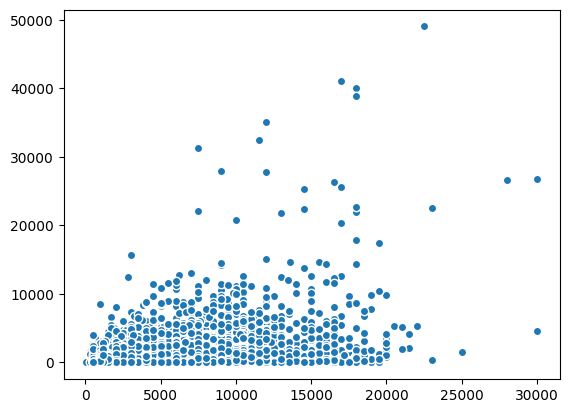

In [ ]:
plt.scatter(customer["CREDIT_LIMIT"], customer["PURCHASES"], edgecolors="white");


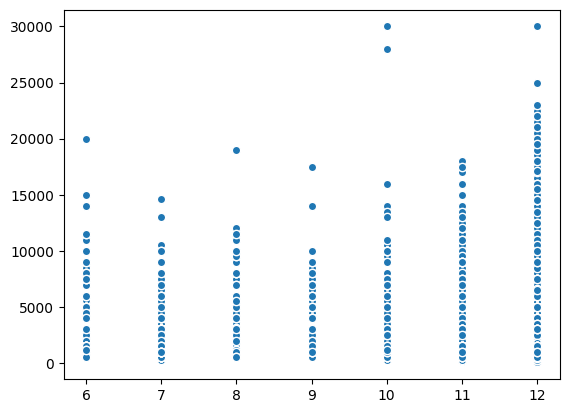

In [ ]:
plt.scatter(customer["TENURE"], customer["CREDIT_LIMIT"], edgecolors="white");


In [ ]:
df = customer.copy()
df = df.select_dtypes(include = ["float64", "int64"])

In [ ]:
#Exemple de la variable "Balance"
df1 = df["BALANCE"].copy()


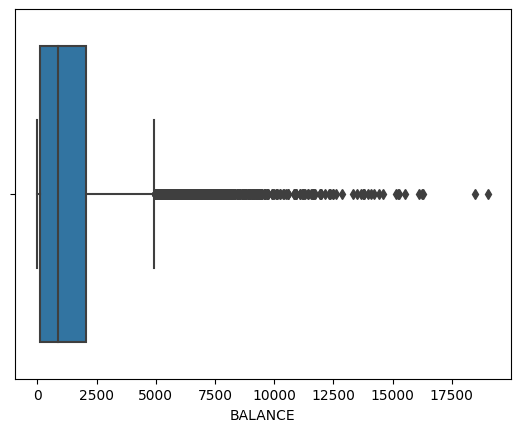

In [ ]:
sns.boxplot(x=df1);


In [ ]:
columns=['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
         'CASH_ADVANCE', 'CREDIT_LIMIT',
        'PAYMENTS', 'MINIMUM_PAYMENTS']

for c in columns:
    df_table = df[c].copy()
    Q1 = df_table.quantile(0.25)
    Q3 = df_table.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q1 + 1.5*IQR

    outliers_number = (( df_table < (lower_bound)) | (df_table > (upper_bound))).sum()
    outliers_number

    print("\n" + c)
    print("lower_bound is " + str(lower_bound))
    print("upper_bound is " + str(upper_bound))
    print("Q1 is : " + str(Q1))
    print("Q3 is : " + str(Q3))

    percentage = round((100*outliers_number) / (len(df_table)),2)
    print(str(outliers_number) + " of " + str(len(df_table)) + " is outlier (%" + str(percentage) + ")")




BALANCE
lower_bound is -2760.5052645
upper_bound is 3017.0690955000005
Q1 is : 128.2819155
Q3 is : 2054.1400355
1434 of 8950 is outlier (%16.02)

PURCHASES
lower_bound is -1566.1075000000003
upper_bound is 1645.3775000000003
Q1 is : 39.635
Q3 is : 1110.13
1539 of 8950 is outlier (%17.2)

ONEOFF_PURCHASES
lower_bound is -866.1075
upper_bound is 866.1075
Q1 is : 0.0
Q3 is : 577.405
1703 of 8950 is outlier (%19.03)

INSTALLMENTS_PURCHASES
lower_bound is -702.95625
upper_bound is 702.95625
Q1 is : 0.0
Q3 is : 468.6375
1561 of 8950 is outlier (%17.44)

CASH_ADVANCE
lower_bound is -1670.7317088750003
upper_bound is 1670.7317088750003
Q1 is : 0.0
Q3 is : 1113.8211392500002
1717 of 8950 is outlier (%19.18)

CREDIT_LIMIT
lower_bound is -5750.0
upper_bound is 8950.0
Q1 is : 1600.0
Q3 is : 6500.0
1129 of 8950 is outlier (%12.61)

PAYMENTS
lower_bound is -1893.5110601250003
upper_bound is 2660.0633921250005
Q1 is : 383.276166
Q3 is : 1901.1343167500002
1512 of 8950 is outlier (%16.89)

MINIMUM_PA

il y a un nombre important de pourcentages et de valeurs aberrantes. Si nous éliminons les valeurs aberrantes, nous perdons de nombreuses lignes. C'est pourquoi la façon prudente de procéder est de créer des plages pour traiter les valeurs extrêmes. De cette manière, nous réduirons les effets sur notre ensemble de données sans supprimer les valeurs aberrantes.









In [ ]:
columns=['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT',
        'PAYMENTS', 'MINIMUM_PAYMENTS']

for c in columns:

    Range=c+'_RANGE'
    df[Range]=0
    df.loc[((df[c]>0)&(df[c]<=500)),Range]=1
    df.loc[((df[c]>500)&(df[c]<=1000)),Range]=2
    df.loc[((df[c]>1000)&(df[c]<=3000)),Range]=3
    df.loc[((df[c]>3000)&(df[c]<=5000)),Range]=4
    df.loc[((df[c]>5000)&(df[c]<=10000)),Range]=5
    df.loc[((df[c]>10000)),Range]=6

In [ ]:
columns=['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
         'CASH_ADVANCE_FREQUENCY', 'PRC_FULL_PAYMENT']

for c in columns:

    Range=c+'_RANGE'
    df[Range]=0
    df.loc[((df[c]>0)&(df[c]<=0.1)),Range]=1
    df.loc[((df[c]>0.1)&(df[c]<=0.2)),Range]=2
    df.loc[((df[c]>0.2)&(df[c]<=0.3)),Range]=3
    df.loc[((df[c]>0.3)&(df[c]<=0.4)),Range]=4
    df.loc[((df[c]>0.4)&(df[c]<=0.5)),Range]=5
    df.loc[((df[c]>0.5)&(df[c]<=0.6)),Range]=6
    df.loc[((df[c]>0.6)&(df[c]<=0.7)),Range]=7
    df.loc[((df[c]>0.7)&(df[c]<=0.8)),Range]=8
    df.loc[((df[c]>0.8)&(df[c]<=0.9)),Range]=9
    df.loc[((df[c]>0.9)&(df[c]<=1.0)),Range]=10


In [ ]:
columns=['PURCHASES_TRX', 'CASH_ADVANCE_TRX']

for c in columns:

    Range=c+'_RANGE'
    df[Range]=0
    df.loc[((df[c]>0)&(df[c]<=5)),Range]=1
    df.loc[((df[c]>5)&(df[c]<=10)),Range]=2
    df.loc[((df[c]>10)&(df[c]<=15)),Range]=3
    df.loc[((df[c]>15)&(df[c]<=20)),Range]=4
    df.loc[((df[c]>20)&(df[c]<=30)),Range]=5
    df.loc[((df[c]>30)&(df[c]<=50)),Range]=6
    df.loc[((df[c]>50)&(df[c]<=100)),Range]=7
    df.loc[((df[c]>100)),Range]=8


In [ ]:
df.drop(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY',  'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT' ], axis=1, inplace=True)

X= np.asarray(df)


#Normalisation des Inputs

La normalisation des entrées est une pratique qui vise à créer des conditions plus favorables à l'apprentissage des modèles, en garantissant des échelles cohérentes et en améliorant la convergence des algorithmes.

In [ ]:

scale = StandardScaler()
X = scale.fit_transform(X)
X.shape


(8950, 17)

#Modélisation
La modélisation avec K-means pour la segmentation des clients présente des avantages significatifs. Elle permet d'identifier naturellement des groupes similaires dans les données clients, offre une simplicité d'utilisation et une interprétabilité des résultats. De plus, K-means est efficace avec des données numériques, scalable pour de grandes bases de clients, et adaptable aux changements dans les données.

In [ ]:
n_clusters=30
cost=[]
for i in range(1,n_clusters):
    kmean= KMeans(i)
    kmean.fit(X)
    cost.append(kmean.inertia_)


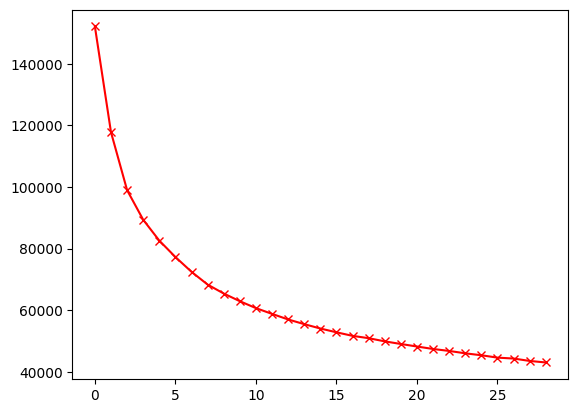

In [ ]:
plt.plot(cost, 'rx-')


In [ ]:

kmean= KMeans( n_clusters=6,  n_init=15, max_iter=20 , random_state=44)
kmean.fit(X)
labels=kmean.labels_


In [ ]:
clusters=pd.concat([df, pd.DataFrame({'cluster':labels})], axis=1)
clusters.head()


,TENURE,BALANCE_RANGE,PURCHASES_RANGE,ONEOFF_PURCHASES_RANGE,INSTALLMENTS_PURCHASES_RANGE,CASH_ADVANCE_RANGE,CREDIT_LIMIT_RANGE,PAYMENTS_RANGE,MINIMUM_PAYMENTS_RANGE,BALANCE_FREQUENCY_RANGE,PURCHASES_FREQUENCY_RANGE,ONEOFF_PURCHASES_FREQUENCY_RANGE,PURCHASES_INSTALLMENTS_FREQUENCY_RANGE,CASH_ADVANCE_FREQUENCY_RANGE,PRC_FULL_PAYMENT_RANGE,PURCHASES_TRX_RANGE,CASH_ADVANCE_TRX_RANGE,cluster
0,12,1,1,0,1,0,2,1,1,9,2,0,1,0,0,1,0,3
1,12,4,0,0,0,5,5,4,3,10,0,0,0,3,3,0,1,1
2,12,3,2,2,0,0,5,2,2,10,10,10,0,0,0,3,0,2
3,12,3,3,3,0,1,5,0,2,7,1,1,0,1,0,1,1,3
4,12,2,1,1,0,0,3,2,1,10,1,1,0,0,0,1,0,3


#Interpretation des segmentations

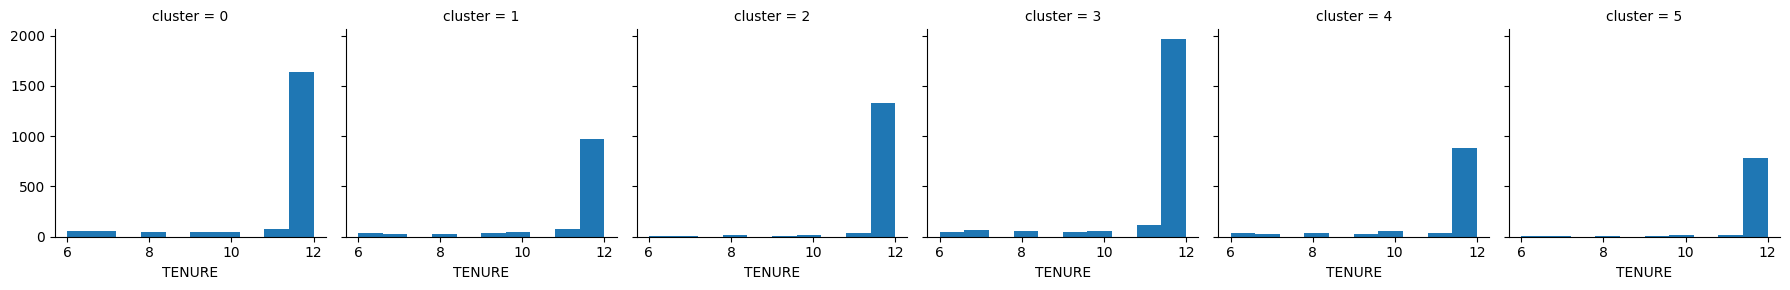

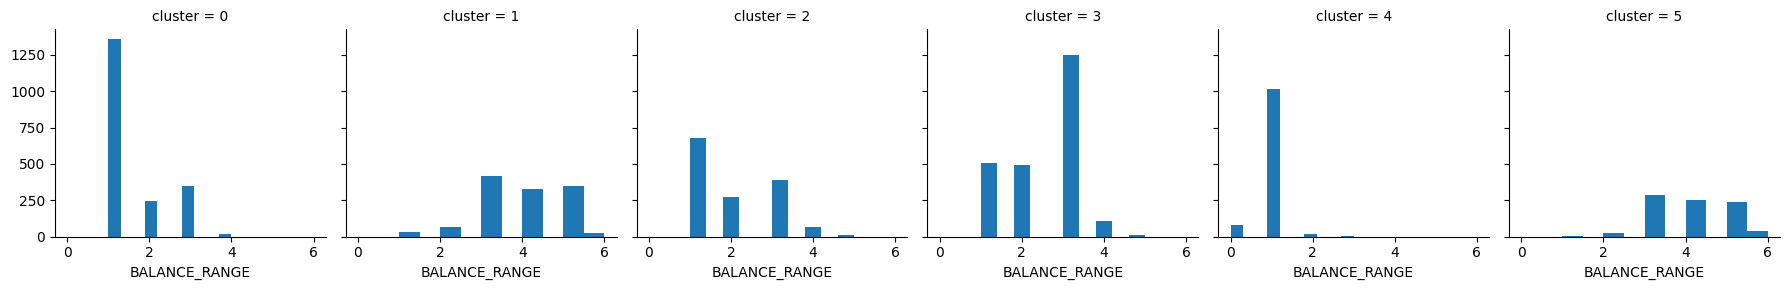

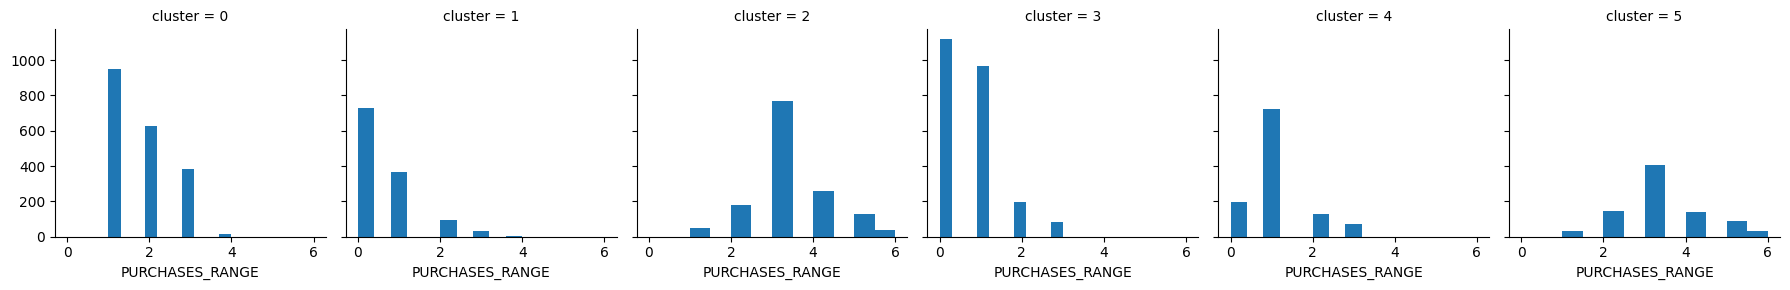

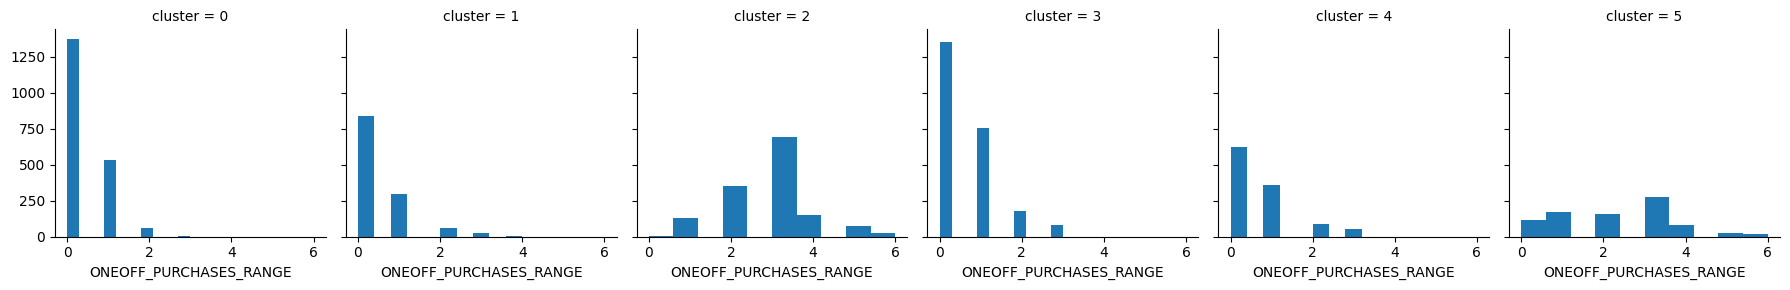

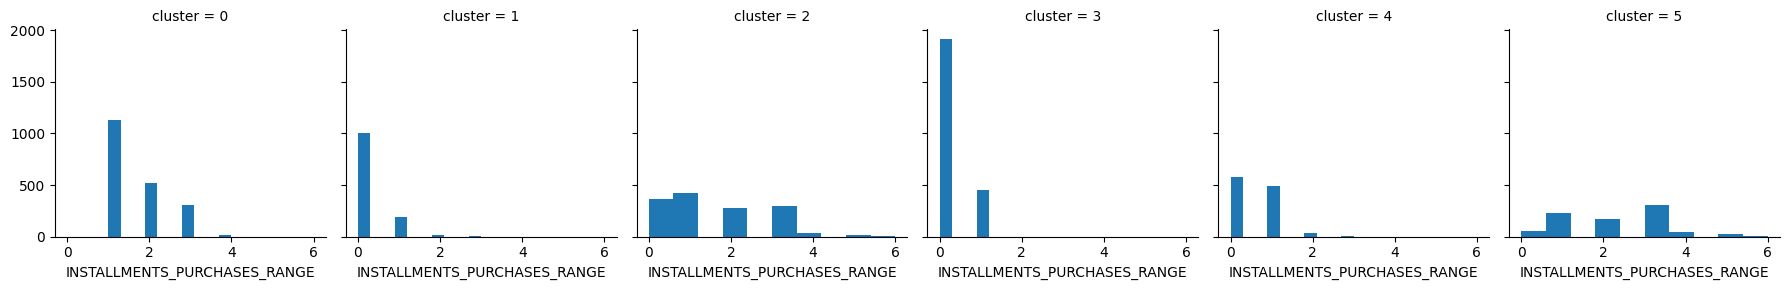

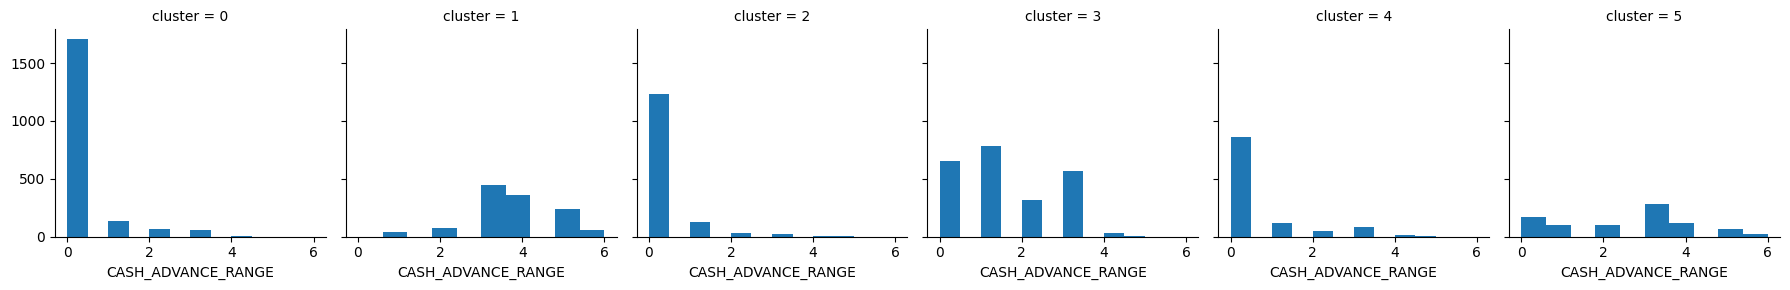

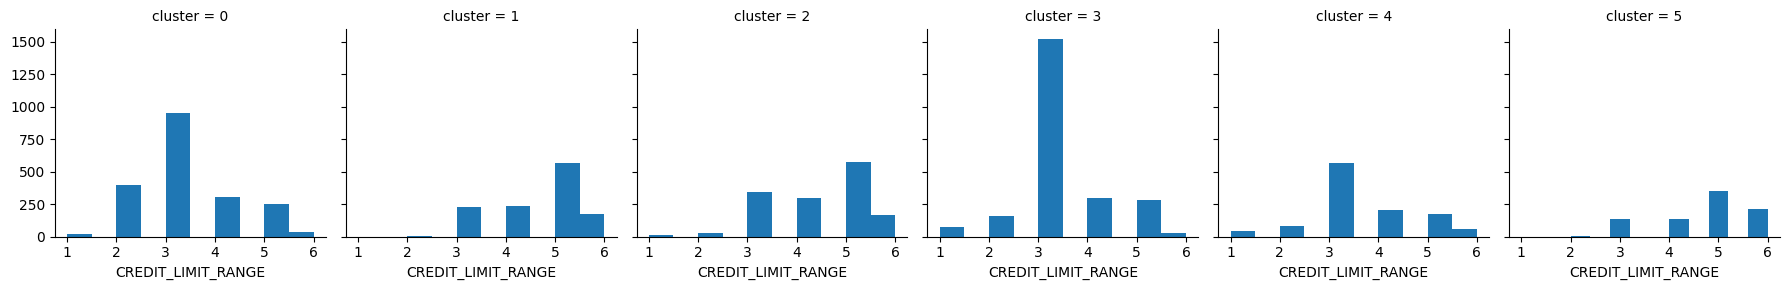

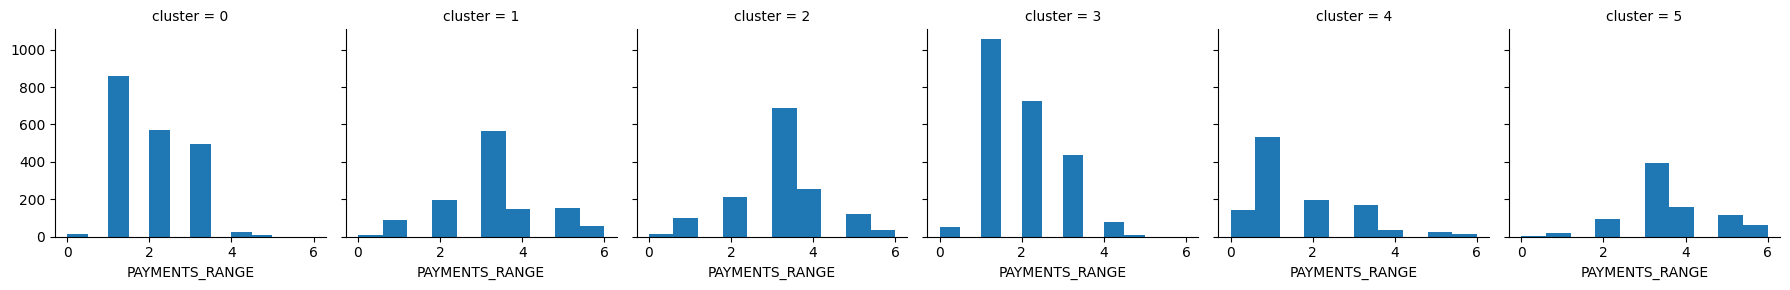

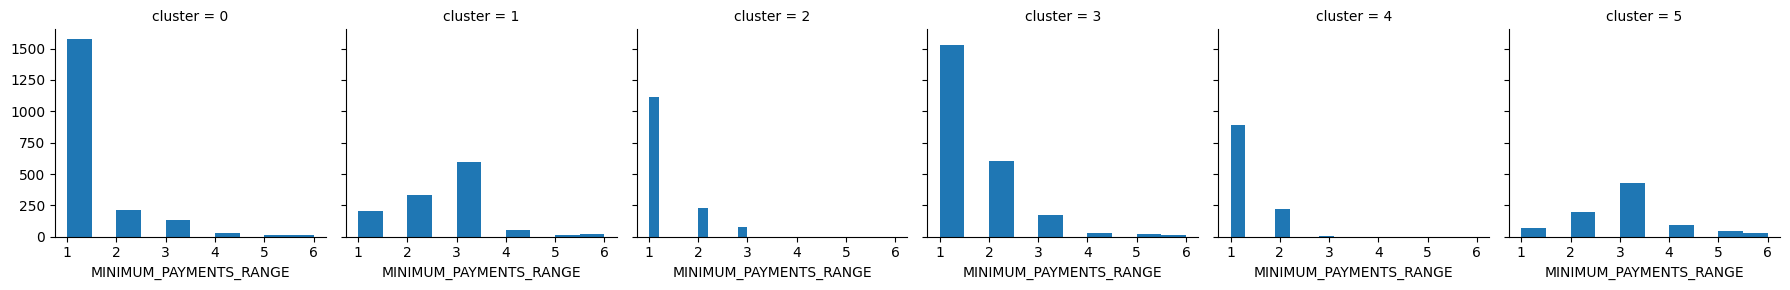

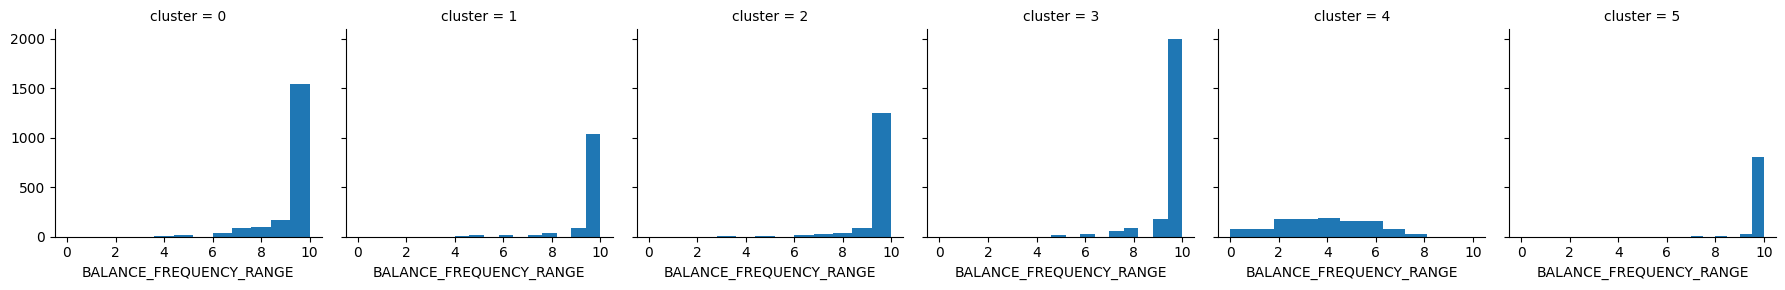

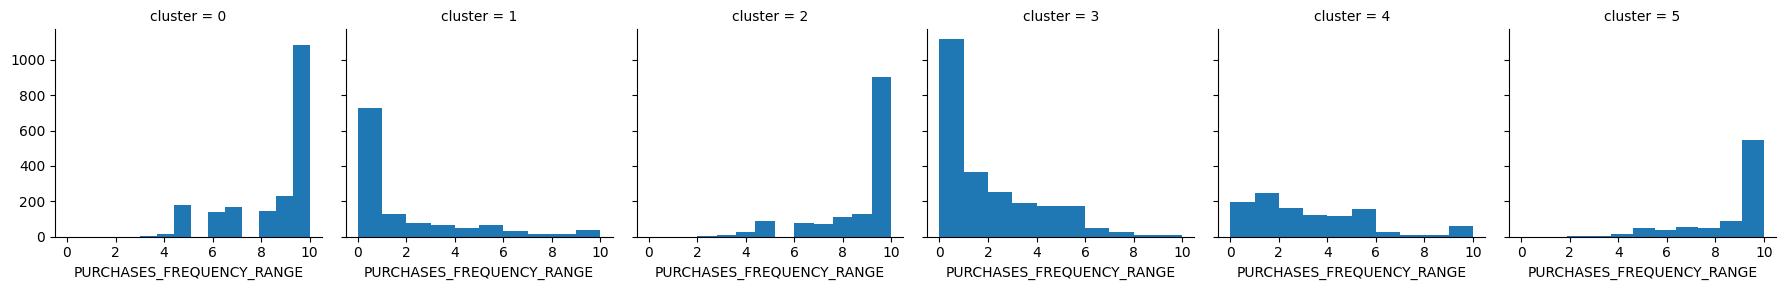

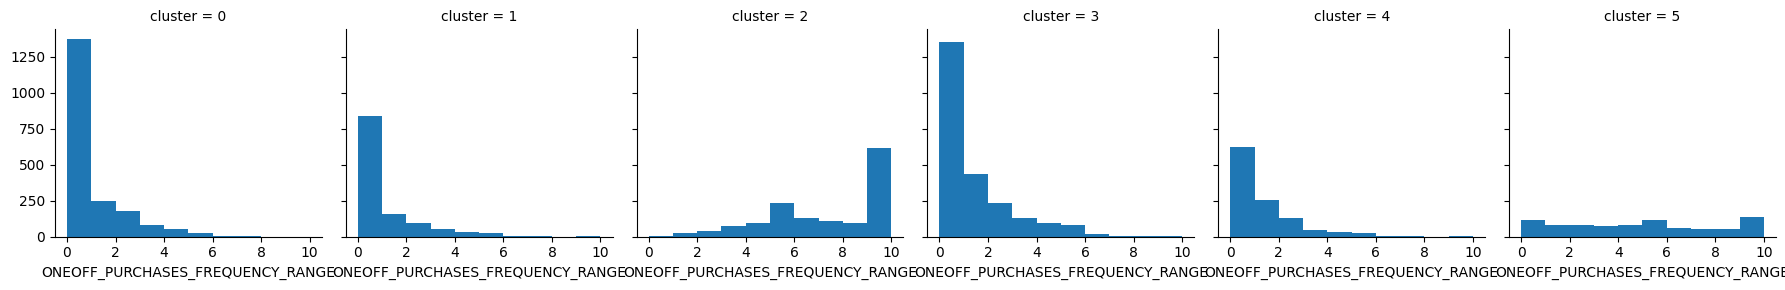

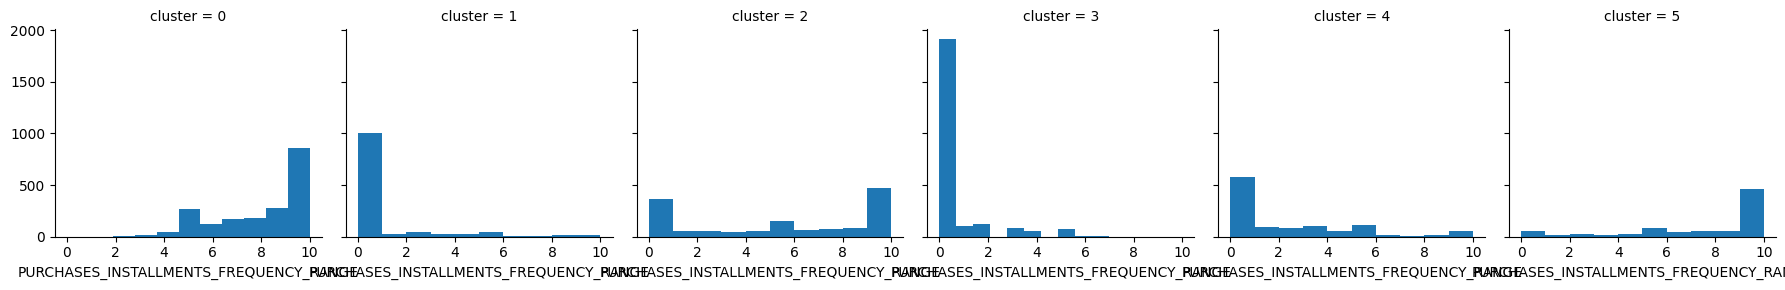

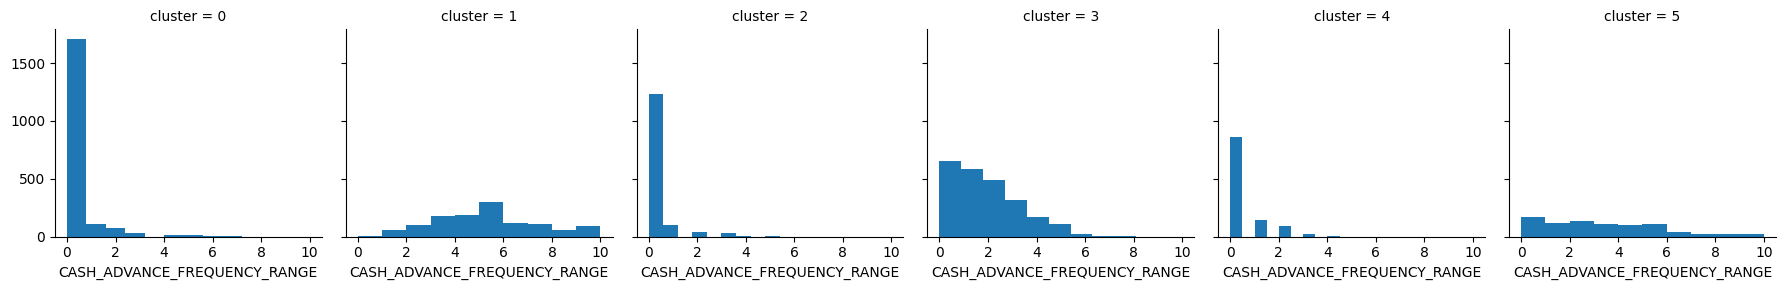

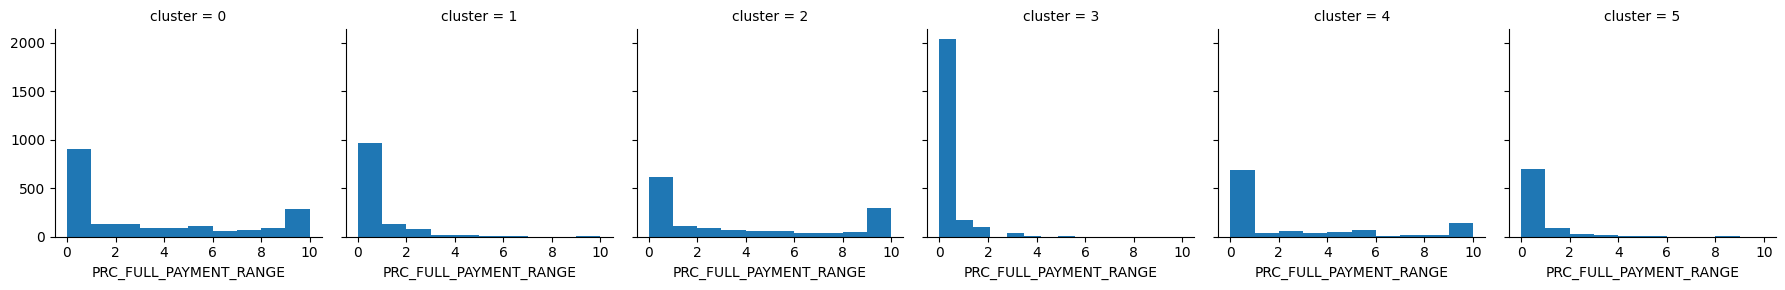

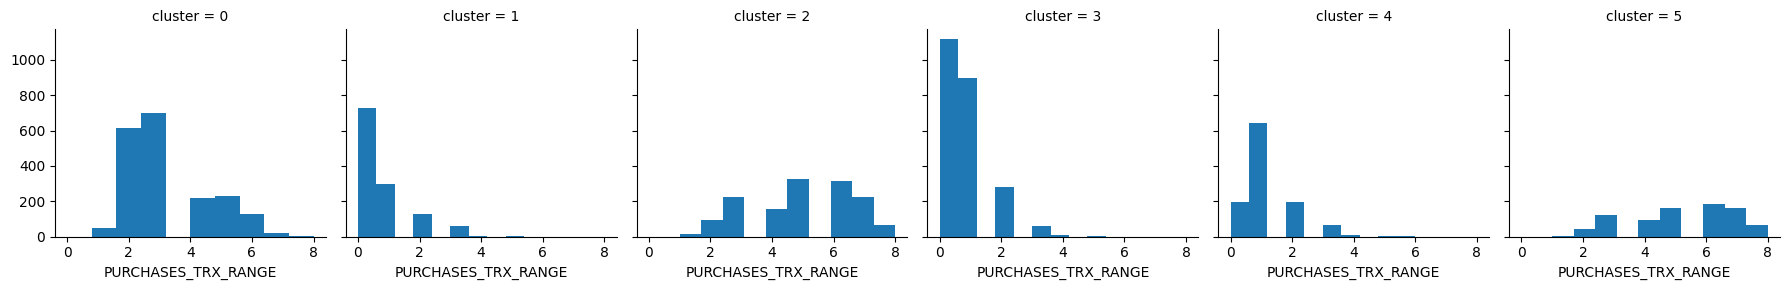

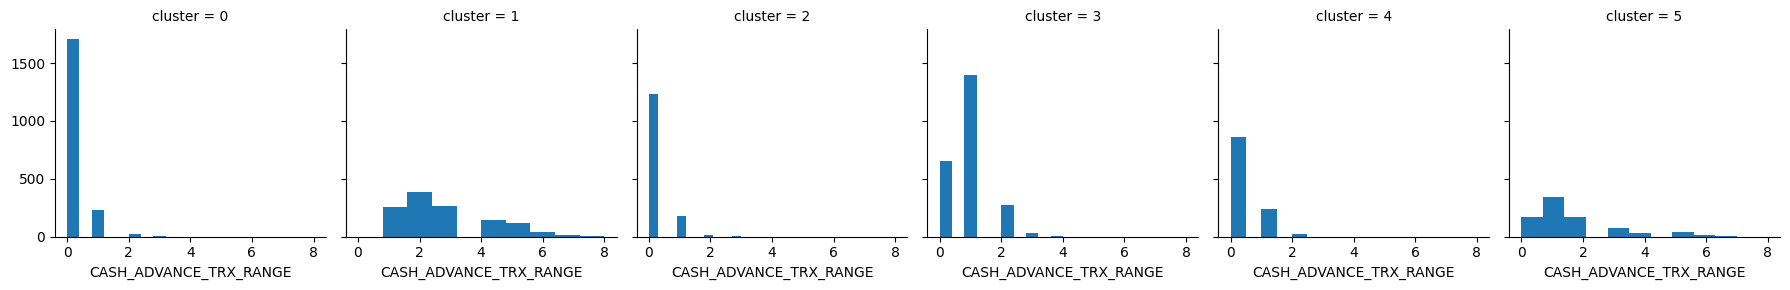

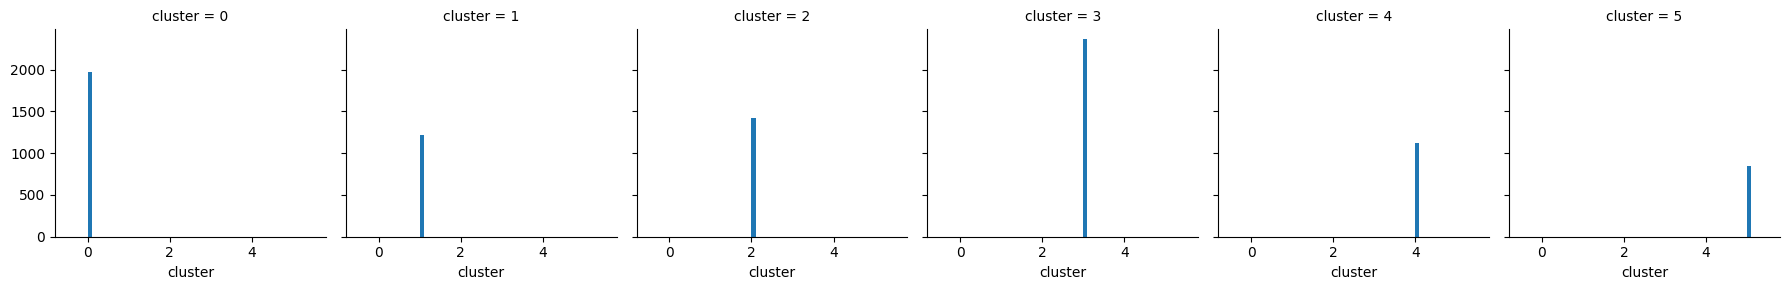

In [ ]:
for c in clusters:
    grid= sns.FacetGrid(clusters, col='cluster')
    grid.map(plt.hist, c)


Cluster5 : Personnes avec une limite de crédit moyenne à élevée qui effectuent tous types d'achats.

Cluster4 : Ce groupe compte davantage de personnes avec des paiements en retard qui retirent plus fréquemment de l'argent liquide à l'avance.

Cluster3 : Dépensiers moins importants avec des limites de crédit moyennes à élevées qui effectuent principalement des achats à tempérament.

Cluster2 : Personnes avec une limite de crédit élevée qui retirent plus fréquemment de l'argent liquide à l'avance.

Cluster1 : Dépensiers importants avec une limite de crédit élevée qui effectuent des achats coûteux.

Cluster0 : Personnes qui ne dépensent pas beaucoup d'argent et qui ont une limite de crédit moyenne à élevée.

#Visualtisation des Segmentations

In [ ]:
dist = 1 - cosine_similarity(X)

pca = PCA(2)
pca.fit(dist)
X_PCA = pca.transform(dist)
X_PCA.shape



(8950, 2)

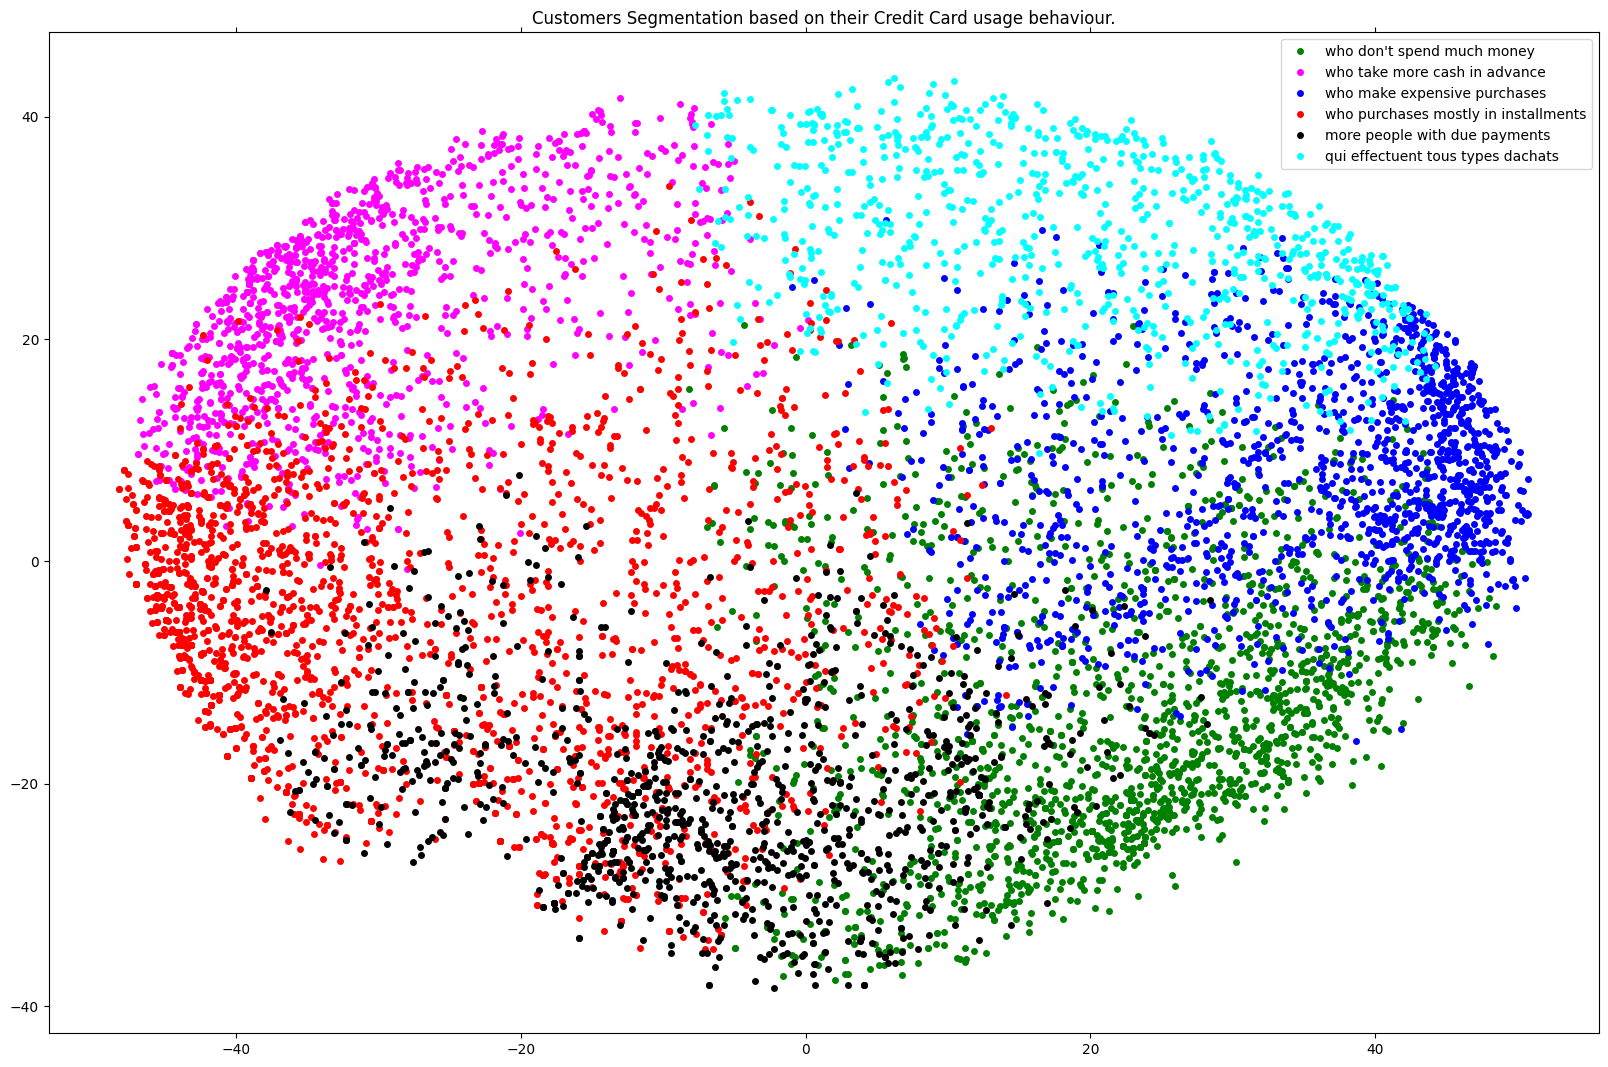

In [ ]:
x, y = X_PCA[:, 0], X_PCA[:, 1]

colors = {5: 'cyan',
          4: 'black',
          3: 'red',
          2: 'blue',
          1: 'magenta',
          0:'green'}

names = {5: 'who make all type of purchases',
         4: 'more people with due payments',
         3: 'who purchases mostly in installments',
         2: 'who make expensive purchases',
         1: 'who take more cash in advance',
         0:'who don\'t spend much money'}

df = pd.DataFrame({'x': x, 'y':y, 'label':labels})
groups = df.groupby('label')

fig, ax = plt.subplots(figsize=(20, 13))

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,
            color=colors[name],label=names[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')

ax.legend()
ax.set_title("Customers Segmentation based on their Credit Card usage behaviour.")
plt.show()


# Exploitation des Résultats:

On peut exploiter ces résultats de la manière suivante :

**1.Stratégies de Marketing Ciblé :**

Cluster5 (Tous types d'achats) : Concevez des campagnes mettant en avant la diversité des produits et offres, soulignant la capacité à s'adapter à différents besoins.\
Cluster4 (Paiements en retard, Retraits fréquents) : Proposez des programmes de remboursement flexibles, des rappels de paiement, et des incitations pour réduire les paiements en retard. Offrez des avantages pour l'utilisation responsable des avances de fonds.\
**2.Personnalisation de l'Expérience Client :**

Cluster3 (Achats à tempérament) : Personnalisez les recommandations de produits en mettant en avant des options d'achat à tempérament. Adaptez les communications pour mettre en valeur les avantages de ce mode d'achat.\
Cluster2 (Retraits fréquents, Limite de crédit élevée) : Proposez des avantages exclusifs pour les retraits d'argent liquide et personnalisez les offres en fonction de la limite de crédit élevée.\
**3.Gestion du Risque :**

Cluster4 (Paiements en retard) : Mettez en place des mécanismes de suivi renforcés, des alertes préventives, et proposez des solutions adaptées pour gérer les retards de paiement.\
**4.Optimisation des Opérations :**

Cluster3 (Achats à tempérament) : Ajustez les niveaux de stock pour répondre à la demande d'achats à tempérament. Gérez efficacement les flux de trésorerie pour accompagner ce modèle d'achat.\
Cluster2 (Retraits fréquents) : Adaptez les politiques de crédit pour mieux gérer les avances de fonds et optimisez les opérations liées à ces transactions.\
**5.Développement de Produits :**

Cluster1 (Achats coûteux) : Développez des produits de gamme supérieure et proposez des services exclusifs pour répondre aux besoins spécifiques de ce segment.
Réduction des Coûts Marketing :

Cluster0 (Dépenses limitées) : Ciblez des canaux marketing plus économiques tout en maximisant l'efficacité pour atteindre ce segment qui ne dépense pas beaucoup.
**6.Réévaluation Régulière :**

Tous les Clusters : Surveillez l'évolution des clusters au fil du temps. Adaptez périodiquement les stratégies en fonction des changements dans le comportement des clients et des tendances du marché.








#Conclusion

Différentes actions peuvent être entreprises en fonction des 6 clusters que nous avons séparés. Par exemple, (pour le Cluster 3), nous pouvons encourager les utilisateurs qui font des achats en plusieurs versements en augmentant leurs options spéciales de paiement échelonné, ou (pour le Cluster 2), les clients qui retirent de l'argent liquide et effectuent des achats en espèces peuvent bénéficier de frais réduits lorsqu'ils utilisent leur carte de crédit, ou encore (pour le Cluster 5), nous pouvons renforcer leur fidélité en proposant des offres spéciales aux personnes bénéficiant de limites élevées et réalisant toutes sortes de dépenses.









